In [1]:
# Download packages

from PIL import Image
import imageio
import numpy as np
from skimage.transform import resize
import multipagetiff as mtif
from matplotlib import pyplot as plt
import skimage
from skimage.color import rgb2gray
import scipy.ndimage as ndi 
from skimage.transform import rescale
from skimage.filters import threshold_otsu

plt.rcParams['figure.dpi'] = 1000
plt.rcParams['savefig.dpi'] = 1000


In [3]:
# Functions
def read_tiff(path):
    """
    path - Path to the multipage-tiff file
    """
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)



def cleaning_hole(image) : 
    thresh =  threshold_otsu(image)
    
    binary = np.where(image >=thresh, 1, 0)
    #mask_thresh = ndi.binary_dilation(mask_thresh, iterations = 5)
    #mask_thresh = ndi.binary_closing(mask_thresh, iterations = 5)
    binary = ndi.median_filter(binary, 10)
    binary = skimage.morphology.closing(binary)

    return binary

In [4]:
### Import component file

multi_tiff = read_tiff('leo_testis/20452842_1A_2_component_data.tif')
selected_tiff = multi_tiff[0:9]


selected_tiff[8] = rescale(multi_tiff[8], 8, channel_axis = 2)

/var/folders/ck/1_s31h6x4hl08cn3mg813_6r0000gn/T/ipykernel_6154/3916764357.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images)


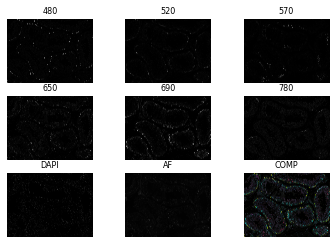

In [5]:
### Create image overview

fig, axes = plt.subplots(3,3)
axes[0,0].imshow(selected_tiff[0], cmap = 'gray')
axes[0,0].axis('off')
axes[0,0].set_title('480', fontsize=8)
axes[0,1].imshow(selected_tiff[1], cmap = 'gray')
axes[0,1].axis('off')
axes[0,1].set_title('520', fontsize=8)
axes[0,2].imshow(selected_tiff[2], cmap = 'gray')
axes[0,2].axis('off')
axes[0,2].set_title('570', fontsize=8)
axes[1,0].imshow(selected_tiff[3], cmap = 'gray')
axes[1,0].axis('off')
axes[1,0].set_title('650', fontsize=8)
axes[1,1].imshow(selected_tiff[4], cmap = 'gray')
axes[1,1].axis('off')
axes[1,1].set_title('690', fontsize=8)
axes[1,2].imshow(selected_tiff[5], cmap = 'gray')
axes[1,2].axis('off')
axes[1,2].set_title('780', fontsize=8)
axes[2,0].imshow(selected_tiff[6], cmap = 'gray')
axes[2,0].axis('off')
axes[2,0].set_title('DAPI', fontsize=8)
axes[2,1].imshow(selected_tiff[7], cmap = 'gray')
axes[2,1].axis('off')
axes[2,1].set_title('AF', fontsize=8)
axes[2,2].imshow(selected_tiff[8])
axes[2,2].axis('off')
axes[2,2].set_title('COMP', fontsize=8)

plt.savefig('leo_testis/Output/overview.tif', dpi= 1000)

In [6]:
thresh_sel = np.copy(selected_tiff[:8])
for i in range(thresh_sel.size):
    thresh_sel[i] = cleaning_hole(selected_tiff[i])

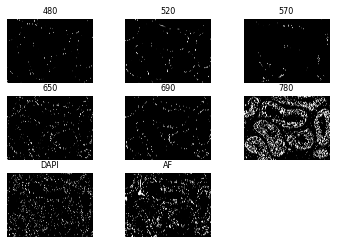

In [16]:
fig, axes = plt.subplots(3,3)
axes[0,0].imshow(thresh_sel[0], cmap = 'gray')
axes[0,0].axis('off')
axes[0,0].set_title('480', fontsize=8)
axes[0,1].imshow(thresh_sel[1], cmap = 'gray')
axes[0,1].axis('off')
axes[0,1].set_title('520', fontsize=8)
axes[0,2].imshow(thresh_sel[2], cmap = 'gray')
axes[0,2].axis('off')
axes[0,2].set_title('570', fontsize=8)
axes[1,0].imshow(thresh_sel[3], cmap = 'gray')
axes[1,0].axis('off')
axes[1,0].set_title('650', fontsize=8)
axes[1,1].imshow(thresh_sel[4], cmap = 'gray')
axes[1,1].axis('off')
axes[1,1].set_title('690', fontsize=8)
axes[1,2].imshow(thresh_sel[5], cmap = 'gray')
axes[1,2].axis('off')
axes[1,2].set_title('780', fontsize=8)
axes[2,0].imshow(thresh_sel[6], cmap = 'gray')
axes[2,0].axis('off')
axes[2,0].set_title('DAPI', fontsize=8)
axes[2,1].imshow(thresh_sel[7], cmap = 'gray')
axes[2,1].axis('off')
axes[2,1].set_title('AF', fontsize=8)
axes[2,2].axis('off')



plt.savefig('leo_testis/Output/cleanup.tif', dpi= 1000)

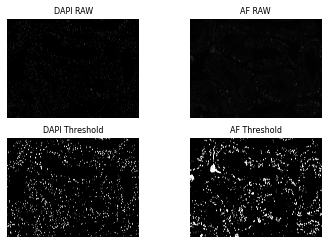

In [17]:
fig, axes = plt.subplots(2,2)
axes[0,0].imshow(selected_tiff[6], cmap = 'gray')
axes[0,0].axis('off')
axes[0,0].set_title('DAPI RAW', fontsize=8)
axes[0,1].imshow(selected_tiff[7], cmap = 'gray')
axes[0,1].axis('off')
axes[0,1].set_title('AF RAW', fontsize=8)
axes[1,0].imshow(thresh_sel[6], cmap = 'gray')
axes[1,0].axis('off')
axes[1,0].set_title('DAPI Threshold', fontsize=8)
axes[1,1].imshow(thresh_sel[7], cmap = 'gray')
axes[1,1].axis('off')
axes[1,1].set_title('AF Threshold', fontsize=8)

plt.savefig('leo_testis/Output/bg_pre.tif', dpi= 1000)

In [86]:
# Combine all signals

cell_layers = np.delete(thresh_sel, [5,6,7])
cell_layers = np.sum(cell_layers) != 0
cell_layers = cell_layers.astype(int)
cell_layers 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

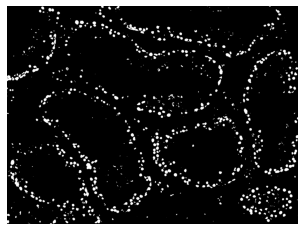

In [87]:
plt.imshow(cell_layers, cmap = "gray")
plt.axis('off')
plt.savefig('leo_testis/Output/layers.tif', dpi= 1000)

In [31]:
# Marker signals (exclude 780nm)
signal_array = thresh_sel[:5]
# DAPI signal
signal_dapi = thresh_sel[6]
# AF signal
signal_AF = thresh_sel[7]

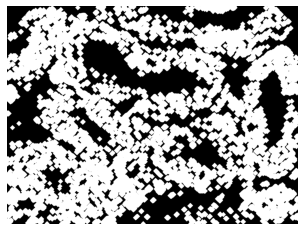

In [88]:
# Background area
bg_signal = np.add(signal_dapi, signal_AF) != 0
bg_signal = ndi.binary_opening(bg_signal)
bg_signal = ndi.binary_closing(bg_signal,structure=np.ones((10,10)))

bg_signal = ndi.binary_fill_holes(bg_signal)


#bg_signal = ndi.median_filter(bg_signal, size =10)
#bg_signal = ndi.binary_erosion(bg_signal, iterations =3)
bg_signal = ndi.binary_dilation(bg_signal, iterations =30)


plt.imshow(bg_signal, cmap = 'gray')
plt.axis('off')
plt.savefig('leo_testis/Output/bg_sum.tif', dpi= 1000)

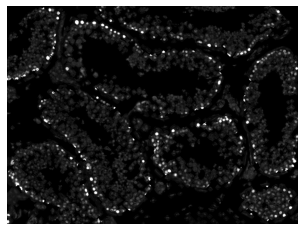

In [96]:
sum_signal = np.sum(selected_tiff[:5])
cross_signal = np.multiply(sum_signal, bg_signal)
mult_signal = ndi.median_filter(cross_signal, size =10)


from skimage import io, exposure
percentiles = np.percentile(mult_signal, (0.5, 99.5))
scaled = exposure.rescale_intensity(mult_signal, in_range=tuple(percentiles))
scaled
#plt.imshow(sum_signal, cmap = 'gray')
#plt.axis('off')
plt.imshow(scaled, cmap = 'gray')
plt.axis('off')
plt.savefig('leo_testis/Output/sum_signals.tif', dpi= 1000)

In [97]:
sum_signal

array([[ 0.        ,  0.2838627 ,  0.12583026, ...,  0.5163826 ,
         0.02595208,  0.17485598],
       [ 0.5533148 ,  0.29553762,  0.13682267, ...,  0.14366691,
         0.2049229 ,  0.53451836],
       [ 0.16427028,  0.4773925 ,  0.05151717, ...,  0.29713514,
         0.24577174,  0.47679168],
       ...,
       [12.657933  , 13.894929  , 15.493423  , ...,  8.686197  ,
         8.504805  ,  9.468805  ],
       [11.47532   , 12.310963  , 14.446103  , ...,  9.397538  ,
         9.499985  ,  9.613619  ],
       [ 9.243538  , 11.029327  ,  9.387762  , ...,  9.172653  ,
        10.5094595 ,  9.946673  ]], dtype=float32)

In [145]:
#from sklearn import preprocessing
#norm_signal = preprocessing.normalize(mult_signal)
#norm_signal = mult_signal


In [44]:
plt.imshow(norm_signal, cmap = 'gray')
plt.axis('off')
#plt.savefig('leo_testis/Output/sum_signals.tif', dpi= 1000)

NameError: name 'norm_signal' is not defined

(-0.5, 3727.5, 2791.5, -0.5)

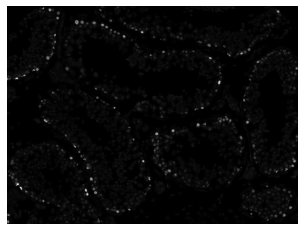

In [45]:
plt.imshow(cross_signal, cmap = 'gray')
plt.axis('off')

In [92]:
#from skimage.filters import try_all_threshold

#fig, ax = try_all_threshold(cell_layers, figsize=(10, 8), verbose=False)
#plt.show()

In [93]:
#mask_denoised = ndi.median_filter(mask_thresh, 15)
#mask_closed = ndi.binary_closing(mask_denoised, iterations = 5)
#pic_clos = ndi.binary_closing(cell_border)
#pic_open = ndi.binary_opening(pic_clos, iterations = 10)
#pic_ero = ndi.binary_erosion(pic_open)
#pic_fin = ndi.binary_dilation(pic_ero, iterations =10)


NameError: name 'pic_clos' is not defined

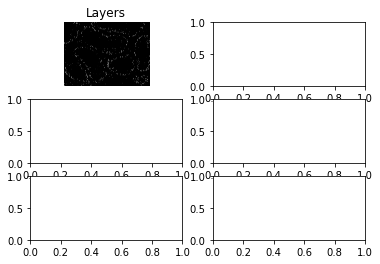

In [46]:

# Plot masked images
fig, axes = plt.subplots(3,2)
axes[0,0].imshow(cell_layers, cmap = 'gray')
axes[0,0].axis('off')
axes[0,0].set_title('Layers')
axes[0,1].imshow(pic_clos, cmap = 'gray')
axes[0,1].axis('off')
axes[0,1].set_title('close')
axes[1,0].imshow(pic_open, cmap = 'gray')
axes[1,0].axis('off')
axes[1,0].set_title('open')
axes[1,1].imshow(pic_ero, cmap = 'gray')
axes[1,1].axis('off')
axes[1,1].set_title('erosion')
axes[2,0].imshow(pic_fin, cmap = 'gray')
axes[2,0].axis('off')
axes[2,0].set_title('dilate')
axes[2,1].imshow(thresh_sel[6], cmap = 'gray')
axes[2,1].axis('off')
axes[2,1].set_title('DAPI')
plt.savefig('leo_testis/Output/threshold.tif', dpi= 1000)

In [101]:

mask = cell_layers


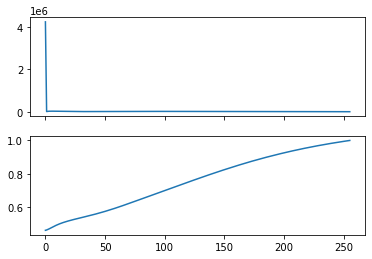

In [48]:
# Create a histogram, binned at each possible value
hist = ndi.histogram(cross_signal, min = 0, max = 10, bins = 256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')


In [102]:
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
from stardist.models import StarDist2D

# prints a list of available models
StarDist2D.from_pretrained()

# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

labels, _ = model.predict_instances(mask)

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


base.py (395): Predicting on non-float input... ( forgot to normalize? )
2022-10-03 13:46:02.141697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 8s 8s/step


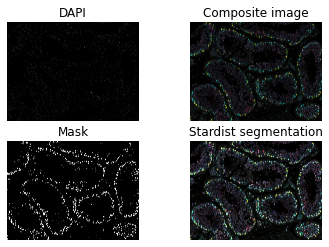

In [104]:
fig, axs = plt.subplots(2,2)

axs[0,0].imshow(selected_tiff[6], cmap = 'gray')
axs[0,0].axis('off')
axs[0,0].set_title("DAPI")

axs[0,1].imshow(selected_tiff[8])
axs[0,1].axis('off')
axs[0,1].set_title('Composite image')

axs[1,1].imshow(render_label(labels, img=selected_tiff[8]))
axs[1,1].axis('off')
axs[1,1].set_title('Stardist segmentation')

axs[1,0].imshow(mask, cmap = 'gray')
axs[1,0].axis('off')
axs[1,0].set_title('Mask')
plt.savefig('leo_testis/Output/stardist_overlap.tif', dpi= 1000)

In [51]:
values, counts = np.unique(labels, return_counts=True)

# Find the outliers of labels from Stardist

q1 = np.quantile(counts[1:], .25)
q3 = np.quantile(counts[1:], .75)
iqr = q3-q1
min_out = q1 -1.5*iqr
max_out = q1 +1.5*iqr


In [55]:
len(thresh_sel)

8

In [65]:
np.max(thresh_sel)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [73]:
dataset = thresh_sel
len_val =500
ext_mx = []

for im in dataset :
    data_mx = normalize(im)
    sum_mx = np.zeros((len_val,), dtype = float)
    
    for label in range(1, len_val ):
                check_mx = np.where(labels == label, 1, 0)
                expression = check_mx * data_mx
                sum_mx[label] = np.mean(expression)
    ext_mx.append(sum_mx)

In [74]:
import pandas as pd

df = pd.DataFrame(np.array(ext_mx).T, columns = ['im_480', 'im_520', 'im_570', 'im_650', 'im_690', 'im_780', 'DAPI', 'AF'])

In [75]:
df_drop = df.iloc[1:, :5]

In [76]:
df

,im_480,im_520,im_570,im_650,im_690,im_780,DAPI,AF
0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,0.000000,0.0,0.0,0.000000,0.000000,8.541034e-05,0.000041,0.000058
2,0.000108,0.0,0.0,0.000130,0.000000,8.646716e-07,0.000000,0.000125
3,0.000088,0.0,0.0,0.000079,0.000000,0.000000e+00,0.000000,0.000054
4,0.000000,0.0,0.0,0.000085,0.000000,2.497940e-06,0.000000,0.000085
...,...,...,...,...,...,...,...,...
495,0.000000,0.0,0.0,0.000068,0.000071,0.000000e+00,0.000000,0.000079
496,0.000000,0.0,0.0,0.000000,0.000000,5.178422e-05,0.000000,0.000016
497,0.000000,0.0,0.0,0.000057,0.000000,7.416961e-05,0.000000,0.000076
498,0.000000,0.0,0.0,0.000008,0.000000,5.197637e-05,0.000042,0.000050


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

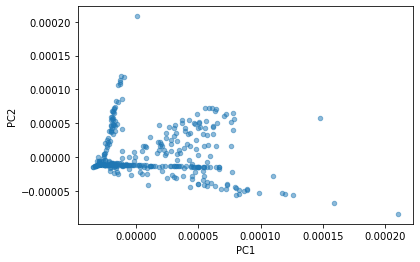

In [77]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_drop)

#print(pca.explained_variance_ratio_)

principalComponents = pca.fit_transform(df_drop)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principalDf.plot.scatter(x='PC1', y='PC2', alpha = .5)


In [78]:
principalComponents.shape

(499, 5)

In [79]:
correlation_matrix = df_drop.corr()

In [80]:
df_drop.values

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.07987875e-04, 0.00000000e+00, 0.00000000e+00, 1.29508590e-04,
        0.00000000e+00],
       [8.82925772e-05, 0.00000000e+00, 0.00000000e+00, 7.86851150e-05,
        0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.73565491e-05,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.26241745e-06,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])